In [1]:
import sys
sys.path.insert(0, "/Users/oozguc/OzPrograms/PyImage/utils/")
import numpy as np
from scipy import signal
from scipy.fftpack import fftfreq
from PIL import Image
import os
from plot_utils import multiplot, doubleplot, quadplot, doubleplotline, multiplotline, overlaymultiplot, plotXY,singleplot
from scipy.signal import blackman
from tifffile import imread
from mpl_toolkits.mplot3d import Axes3D

from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.fftpack import fft
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from Normalize import normalizeFloat, normalizeMinMax, Path, save_tiff_imagej_compatible
from bokeh.plotting import figure, output_file, show
from bokeh.io import export_png, output_notebook
from scipy.signal import find_peaks
from Strip2DFFT import show_peak, doFilterFFT, do2DFFT, do2DInverseFFT, CrossCorrelation, CrossCorrelationStrip, doFilterFFT, do2DFFT, do2DInverseFFT, FFTStrip, RMSStrip

import csv
import pandas as pd

In the block below specify the target directory in which the result images would be written. Specify the full path to the Kymograph image for curvature and intensity to compute auto and cross correlation peaks for both. The axes keyword tells the program that it is seeing an X-Y image

In [2]:
targetdir = '/Users/oozguc/Desktop/test/'
#For curvature
sourceimageA = '/Users/oozguc/Desktop/test/Curvature_C2-20180822_HVJEfusion_mtmg_4x16_1TrackID1.tif'
sourceimageB = '/Users/oozguc/Desktop/test/Distance_C2-20180822_HVJEfusion_mtmg_4x16_1TrackID1.tif'
#For Intensity
sourceimageC = '/Users/oozguc/Desktop/test/Ch1Intensity_C2-20180822_HVJEfusion_mtmg_4x16_1TrackID1.tif'
sourceimageD = '/Users/oozguc/Desktop/test/Ch1Intensity_C2-20180822_HVJEfusion_mtmg_4x16_1TrackID1.tif'

SaveFileName = "Curvature-Curvature";

base = os.path.split(sourceimageA)[-1]

Filename = os.path.splitext(base)
axes = 'YX'

#Method Used : Circlefit = 0, DistanceMethod = 1


#ETrack resolution choise, integer above 1
ResolutionUsed = 1
#Enter time unit in seconds
Time_unit = 5
#Enter pixel to micrometer conversion
Xcalibration = 0.1032


#Set this to true to make FFT axis dimensionless
Normalization = True


In the block below we read the two images using custom made imread function for tifffiles and displaying them

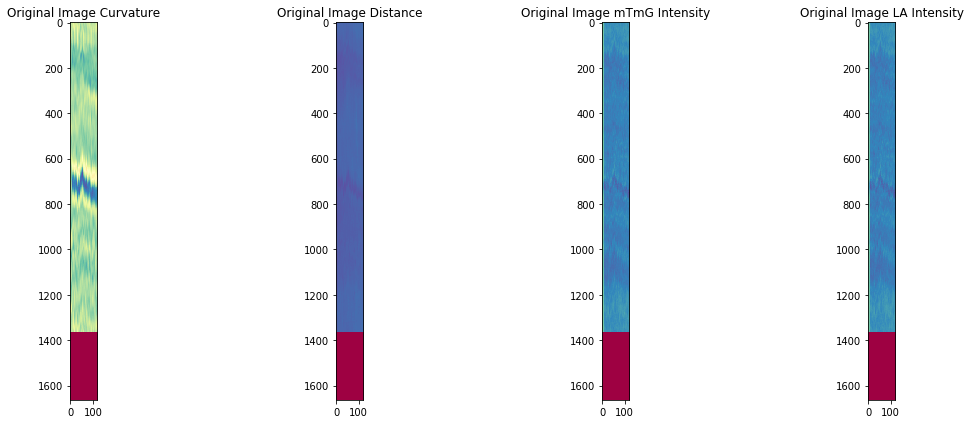

In [3]:
originalimageA = imread(sourceimageA)
originalimageB = imread(sourceimageB)
originalimageC = imread(sourceimageC)
originalimageD = imread(sourceimageD)
quadplot(originalimageA, originalimageB, originalimageC, originalimageD, "Original Image Curvature","Original Image Distance", "Original Image mTmG Intensity", "Original Image LA Intensity")
ApproximatePerimeter = originalimageA.shape[0] * ResolutionUsed *Xcalibration


# Fourier Transform of a block of Kymograph

Parameters to be specified:

1) Time_unit = frame to second conversion for the experiment

2) StartSection = Starting of the block at this pixel unit

3) EndSection = Ending of the block at this pixel unit

4) Max Range in hertz for the Fourier transform plot

# Reset block

In [4]:
#Enter start and end y pixel unit for the section
Start_Sec = 0
End_Sec = 1200 #originalimageA.shape[0]
#Enter start and end x pixel unit for the section
Starttime = 0
Endtime = originalimageA.shape[1]



imageA = originalimageA[Start_Sec:End_Sec, Starttime:Endtime]
imageB = originalimageB[Start_Sec:End_Sec, Starttime:Endtime]
imageC = originalimageC[Start_Sec:End_Sec, Starttime:Endtime]
imageD = originalimageD[Start_Sec:End_Sec, Starttime:Endtime]



In [5]:
#Range of Plot in Hertz
maxXrange = 1
MethodUsed = 0  
Normalization = True


min = 0;
max = 1;
imageA = normalizeMinMax(imageA, min, max)
imageC = normalizeMinMax(imageC, min, max)
imageD = normalizeMinMax(imageD, min, max)

#Max Projection
rmsA, peri = RMSStrip(imageA, Xcalibration)
rmsC, peri = RMSStrip(imageC, Xcalibration)
rmsD, peri = RMSStrip(imageD, Xcalibration)


    

if Normalization:
    
    if MethodUsed == 1:
     rmsA = rmsA / ApproximatePerimeter
     rmsC = rmsC / ApproximatePerimeter
     rmsD = rmsD / ApproximatePerimeter
    
    if MethodUsed == 0:
     rmsA = rmsA * ApproximatePerimeter
     rmsC = rmsC * ApproximatePerimeter
     rmsD = rmsD * ApproximatePerimeter
        
        
        
p = figure(title='RMS Curvature Amplitude', x_axis_label='Perimeter' , y_axis_label='Amplitude' + '(' + '1/um'  + ')', 
           x_range=(0,int(np.round(Xcalibration *imageA.shape[0]))), y_range=(0,1.2*np.max(rmsA)))
p.line(peri ,rmsA, line_width = 2)

output_notebook()
show(p)
export_png(p, filename=targetdir + 'RMS_Curvature_Amplitude_' + Filename[0] + '.png')


p = figure(title='RMS mTmG intensity', x_axis_label='Perimeter' , y_axis_label='Amplitude', 
           x_range=(0,int(np.round(Xcalibration * imageC.shape[0]))), y_range=(0,1.2*np.max(rmsC)))
p.line(peri,rmsC, line_width = 2)

output_notebook()
show(p)
export_png(p, filename=targetdir + 'RMS_mtmG_intensity_Amplitude_' + Filename[0] + '.png')

p = figure(title='RMS LA intensity', x_axis_label='Perimeter' , y_axis_label='Amplitude', 
           x_range=(0,int(np.round(Xcalibration * imageD.shape[0]))), y_range=(0,1.2*np.max(rmsD)))
p.line(peri,rmsD, line_width = 2)

output_notebook()
show(p)
export_png(p, filename=targetdir + 'RMS_LA_intensity_Amplitude_' + Filename[0] + '.png')

block = End_Sec- Start_Sec
axes = 'YX'





Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

In [6]:
#Range of Plot in Hertz
maxXrange = 1
MethodUsed = 1
Normalization = True


min = 0;
max = 1;
imageB = normalizeMinMax(imageB, min, max)

#Max Projection

rmsB, peri = RMSStrip(imageB, Xcalibration)


if Normalization:
    
    if MethodUsed == 1:
     rmsB = rmsB / ApproximatePerimeter
    
    if MethodUsed == 0:
     rmsB = rmsB * ApproximatePerimeter
        
        
        

p = figure(title='RMS Distance Amplitude', x_axis_label='Perimeter' , y_axis_label='Amplitude'+ '(' + 'um'  + ')', 
           x_range=(0,int(np.round(Xcalibration * imageB.shape[0]))), y_range=(0,1.2*np.max(rmsB)))
p.line(peri,rmsB, line_width = 2)

output_notebook()
show(p)
export_png(p, filename=targetdir + 'RMS_Distance_Amplitude_' + Filename[0] + '.png')

block = End_Sec- Start_Sec
axes = 'YX'






Loading BokehJS ...

Cut the Kymograph from the start to the endsection value as specified above

Show the FFT image along with the original image and save it as a tiff file in the target directory, also save the 1D projection of the twoDFFT as a png file

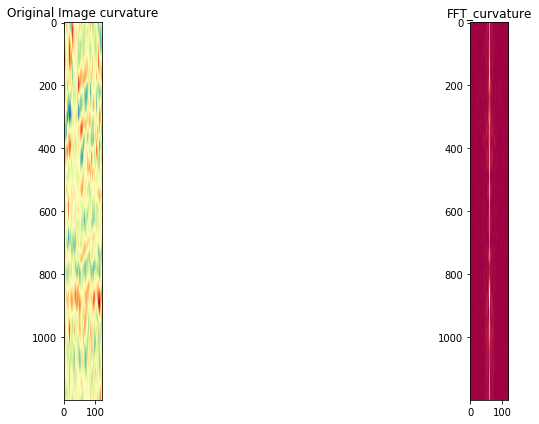

/Users/oozguc/OzPrograms/PyImage/utils/Normalize.py:48: UserWarning: Converting data type from 'float64' to ImageJ-compatible 'float32'.
  warnings.warn("Converting data type from '%s' to ImageJ-compatible '%s'." % (t, np.dtype(t_new)))
/Users/oozguc/OzPrograms/PyImage/utils/Normalize.py:197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  x = x[slices]


Loading BokehJS ...

'/Volumes/JLMLab_Ozge/To_Analyze/HVJE/toAnalze/woLA/FFTPlotBokeh_curvature_Curvature_C2-20200212_4x16_1_mtmgTrackID1.png'

In [7]:

TwoDimage = FFTStrip(imageA)
doubleplot(imageA, TwoDimage, "Original Image curvature",  "FFT_curvature")
save_tiff_imagej_compatible((targetdir + "TwoDFFT_Curvature_" +os.path.basename(Filename[0]) +os.path.basename(Filename[1]) ) , TwoDimage, axes)

#Peak location
veto_frequ = 0.001
#FFT
allfrequ = 0
onedimg, frequ = doFilterFFT(imageA, Time_unit, False)
allfrequ=onedimg


frqY = show_peak(onedimg, frequ, veto_frequ) 

p = figure(title='FFT (hertz) deformation', x_axis_label='Frequency' , y_axis_label='Amplitude'+ '(' + '1/um' + ')')
p.line(frequ, onedimg, legend =  'Frequ =' + str('%.3f'%(frqY))+'Hz', line_width = 2)

Name = targetdir + 'FFTPlotBokeh_curvature_' + Filename[0]


output_notebook()
show(p)
export_png(p, filename= Name+ '.png')

In [8]:
df = pd.DataFrame(list(zip(frequ,onedimg)),columns =['Frequency', 'Amplitude'])
df.to_csv(Name +  '.csv', index = False)  
df


,Frequency,Amplitude
0,0.001653,4208.792969
1,0.003306,3181.973633
2,0.004959,3300.965088
3,0.006612,2075.498047
4,0.008264,2653.781738
5,0.009917,2137.779541
6,0.011570,3060.300293
7,0.013223,1882.032227
8,0.014876,1974.777710
9,0.016529,1487.456299


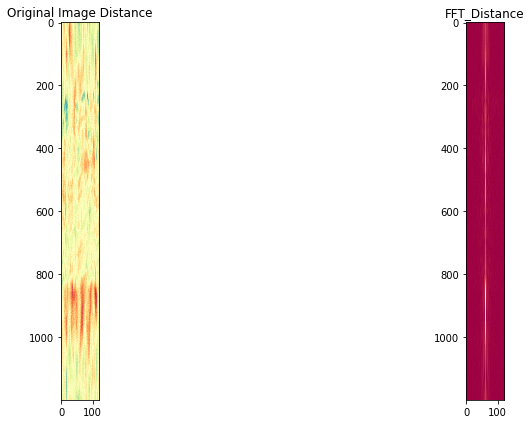

Loading BokehJS ...

'/Volumes/JLMLab_Ozge/To_Analyze/HVJE/toAnalze/woLA/FFTPlotBokeh_Distance_Curvature_C2-20200212_4x16_1_mtmgTrackID1.png'

In [9]:

TwoDimage = FFTStrip(imageB)
doubleplot(imageB, TwoDimage, "Original Image Distance",  "FFT_Distance")
save_tiff_imagej_compatible((targetdir + "TwoDFFT_Distance_" +os.path.basename(Filename[0]) +os.path.basename(Filename[1]) ) , TwoDimage, axes)
#Peak location
veto_frequB = 0.001

allfrequB = 0
onedimgB, frequB = doFilterFFT(imageB, Time_unit, False)
allfrequB=onedimgB


frqYB = show_peak(onedimgB, frequB, veto_frequB) 

p = figure(title='FFT (hertz) Distance', x_axis_label='Frequency' , y_axis_label='Amplitude'+ '(' + 'um' + ')')
p.line(frequB, onedimgB, legend =  'Frequ =' + str('%.3f'%(frqYB))+'Hz', line_width = 2)


Name = targetdir + 'FFTPlotBokeh_Distance_' + Filename[0]
 

output_notebook()
show(p)
export_png(p, filename= Name+ '.png')

In [10]:
df = pd.DataFrame(list(zip(frequ,onedimg)),columns =['Frequency', 'Amplitude'])
df.to_csv(Name +  '.csv', index = False) 
df

,Frequency,Amplitude
0,0.001653,4208.792969
1,0.003306,3181.973633
2,0.004959,3300.965088
3,0.006612,2075.498047
4,0.008264,2653.781738
5,0.009917,2137.779541
6,0.011570,3060.300293
7,0.013223,1882.032227
8,0.014876,1974.777710
9,0.016529,1487.456299


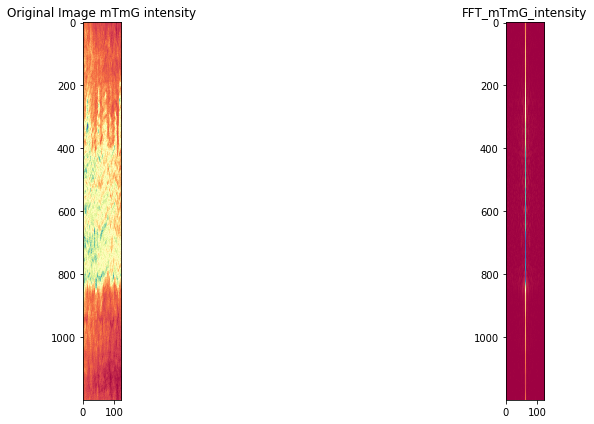

Loading BokehJS ...

'/Volumes/JLMLab_Ozge/To_Analyze/HVJE/toAnalze/woLA/FFTPlotBokeh_mTmG_intensity_Curvature_C2-20200212_4x16_1_mtmgTrackID1.png'

In [11]:

TwoDimage = FFTStrip(imageC)
doubleplot(imageC, TwoDimage, "Original Image mTmG intensity",  "FFT_mTmG_intensity")
save_tiff_imagej_compatible((targetdir + "TwoDFFT_mTmG_intensity_" +os.path.basename(Filename[0]) +os.path.basename(Filename[1]) ) , TwoDimage, axes)

#Peak location
veto_frequC = 0.001
allfrequC = 0
onedimgC, frequC = doFilterFFT(imageC, Time_unit, False)
allfrequC=onedimgC
frqYC = show_peak(onedimgC, frequC, veto_frequC) 

p = figure(title='FFT (hertz) mTmG intensity', x_axis_label='Frequency' , y_axis_label='Amplitude')
p.line(frequC, onedimgC, legend =  'Frequ =' + str('%.3f'%(frqYC))+'Hz', line_width = 2)

Name = targetdir + 'FFTPlotBokeh_mTmG_intensity_' + Filename[0]


output_notebook()
show(p)
export_png(p, filename= Name+ '.png')

In [12]:
df = pd.DataFrame(list(zip(frequ,onedimg)),columns =['Frequency', 'Amplitude'])
df.to_csv(Name +  '.csv', index = False)  
df


,Frequency,Amplitude
0,0.001653,4208.792969
1,0.003306,3181.973633
2,0.004959,3300.965088
3,0.006612,2075.498047
4,0.008264,2653.781738
5,0.009917,2137.779541
6,0.011570,3060.300293
7,0.013223,1882.032227
8,0.014876,1974.777710
9,0.016529,1487.456299


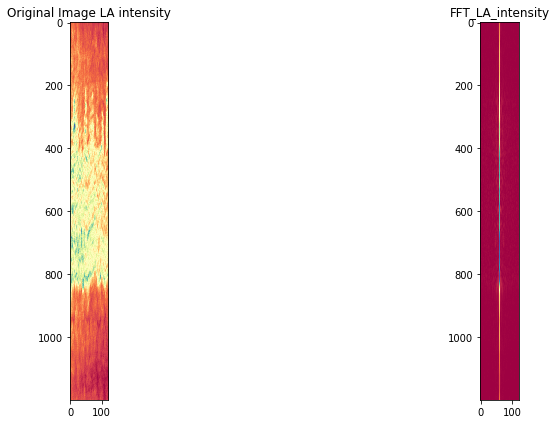

Loading BokehJS ...

'/Volumes/JLMLab_Ozge/To_Analyze/HVJE/toAnalze/woLA/FFTPlotBokeh_LA_intensity_Curvature_C2-20200212_4x16_1_mtmgTrackID1.png'

In [13]:

TwoDimage = FFTStrip(imageD)
doubleplot(imageD, TwoDimage, "Original Image LA intensity",  "FFT_LA_intensity")
save_tiff_imagej_compatible((targetdir + "TwoDFFT_LA_intensity_" +os.path.basename(Filename[0]) +os.path.basename(Filename[1]) ) , TwoDimage, axes)

#Peak location
veto_frequD = 0.001
allfrequD = 0
onedimgD, frequD = doFilterFFT(imageD, Time_unit, False)
allfrequD=onedimgD
frqYD = show_peak(onedimgD, frequD, veto_frequD) 

p = figure(title='FFT (hertz) LA intensity', x_axis_label='Frequency' , y_axis_label='Amplitude')
p.line(frequD, onedimgD, legend =  'Frequ =' + str('%.3f'%(frqYD))+'Hz', line_width = 2)

Name = targetdir + 'FFTPlotBokeh_LA_intensity_' + Filename[0]


output_notebook()
show(p)
export_png(p, filename= Name+ '.png')

In [14]:
df = pd.DataFrame(list(zip(frequ,onedimg)),columns =['Frequency', 'Amplitude'])
df.to_csv(Name +  '.csv', index = False)  
df

,Frequency,Amplitude
0,0.001653,4208.792969
1,0.003306,3181.973633
2,0.004959,3300.965088
3,0.006612,2075.498047
4,0.008264,2653.781738
5,0.009917,2137.779541
6,0.011570,3060.300293
7,0.013223,1882.032227
8,0.014876,1974.777710
9,0.016529,1487.456299


# 